# Classification training set from Praz et al, 2017
As shown in the previous examples, several precoocked retrievals come from [Praz et al, 2017](https://amt.copernicus.org/articles/10/1335/2017/). We took the chance to include in our dataset also the original *human-labeled* training set for riming, melting and hydrometeor classification used in that research. 

In this way, the interested readers can develop their own classification method and benchmark it against our own on the same training set. 

Let's see now how well *Praz et al, 2017* was doing with respect to the human-labeled training set.

In [ ]:
# Imports
import matplotlib as mpl

mpl.rcParams.update(
    {"font.size": 8, "legend.frameon": False, "font.family": "sans-serif", "mathtext.default": "regular"},
)
mpl.rcParams["figure.dpi"] = 400
from mascdb.aux import get_melting_class_id_dict, get_riming_class_id_dict, get_snowflake_class_id_dict
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# MASC DB
from mascdb.api import MASC_DB

dir_path = "/data/MASC_DB"  # It must contains the 4 parquet files and the Zarr storage

# Create MASC_DB instance
mascdb = MASC_DB(dir_path=dir_path)

## Hydrometeor classification

Let's compare how well the built-in method of *Praz et al* was doing with respect to the training set, for hydrometeor classification

In [ ]:
# Select the stacked dataset (as classification was done separately for each CAM)
mascdb_full_db = mascdb.full_db

In [ ]:
# Keep only the hydrometeor class columns (hl_* are the human label ones)
mascdb_keep = mascdb_full_db[["flake_id", "snowflake_class_id", "snowflake_class_name", "hl_snowflake_class_id"]]
mascdb_keep = mascdb_keep.dropna()

# Let's create a new column with hl_snowflake_class_name
hl_snowflake_class_name = [get_snowflake_class_id_dict()[i] for i in mascdb_keep.hl_snowflake_class_id]
mascdb_keep["hl_snowflake_class_name"] = hl_snowflake_class_name

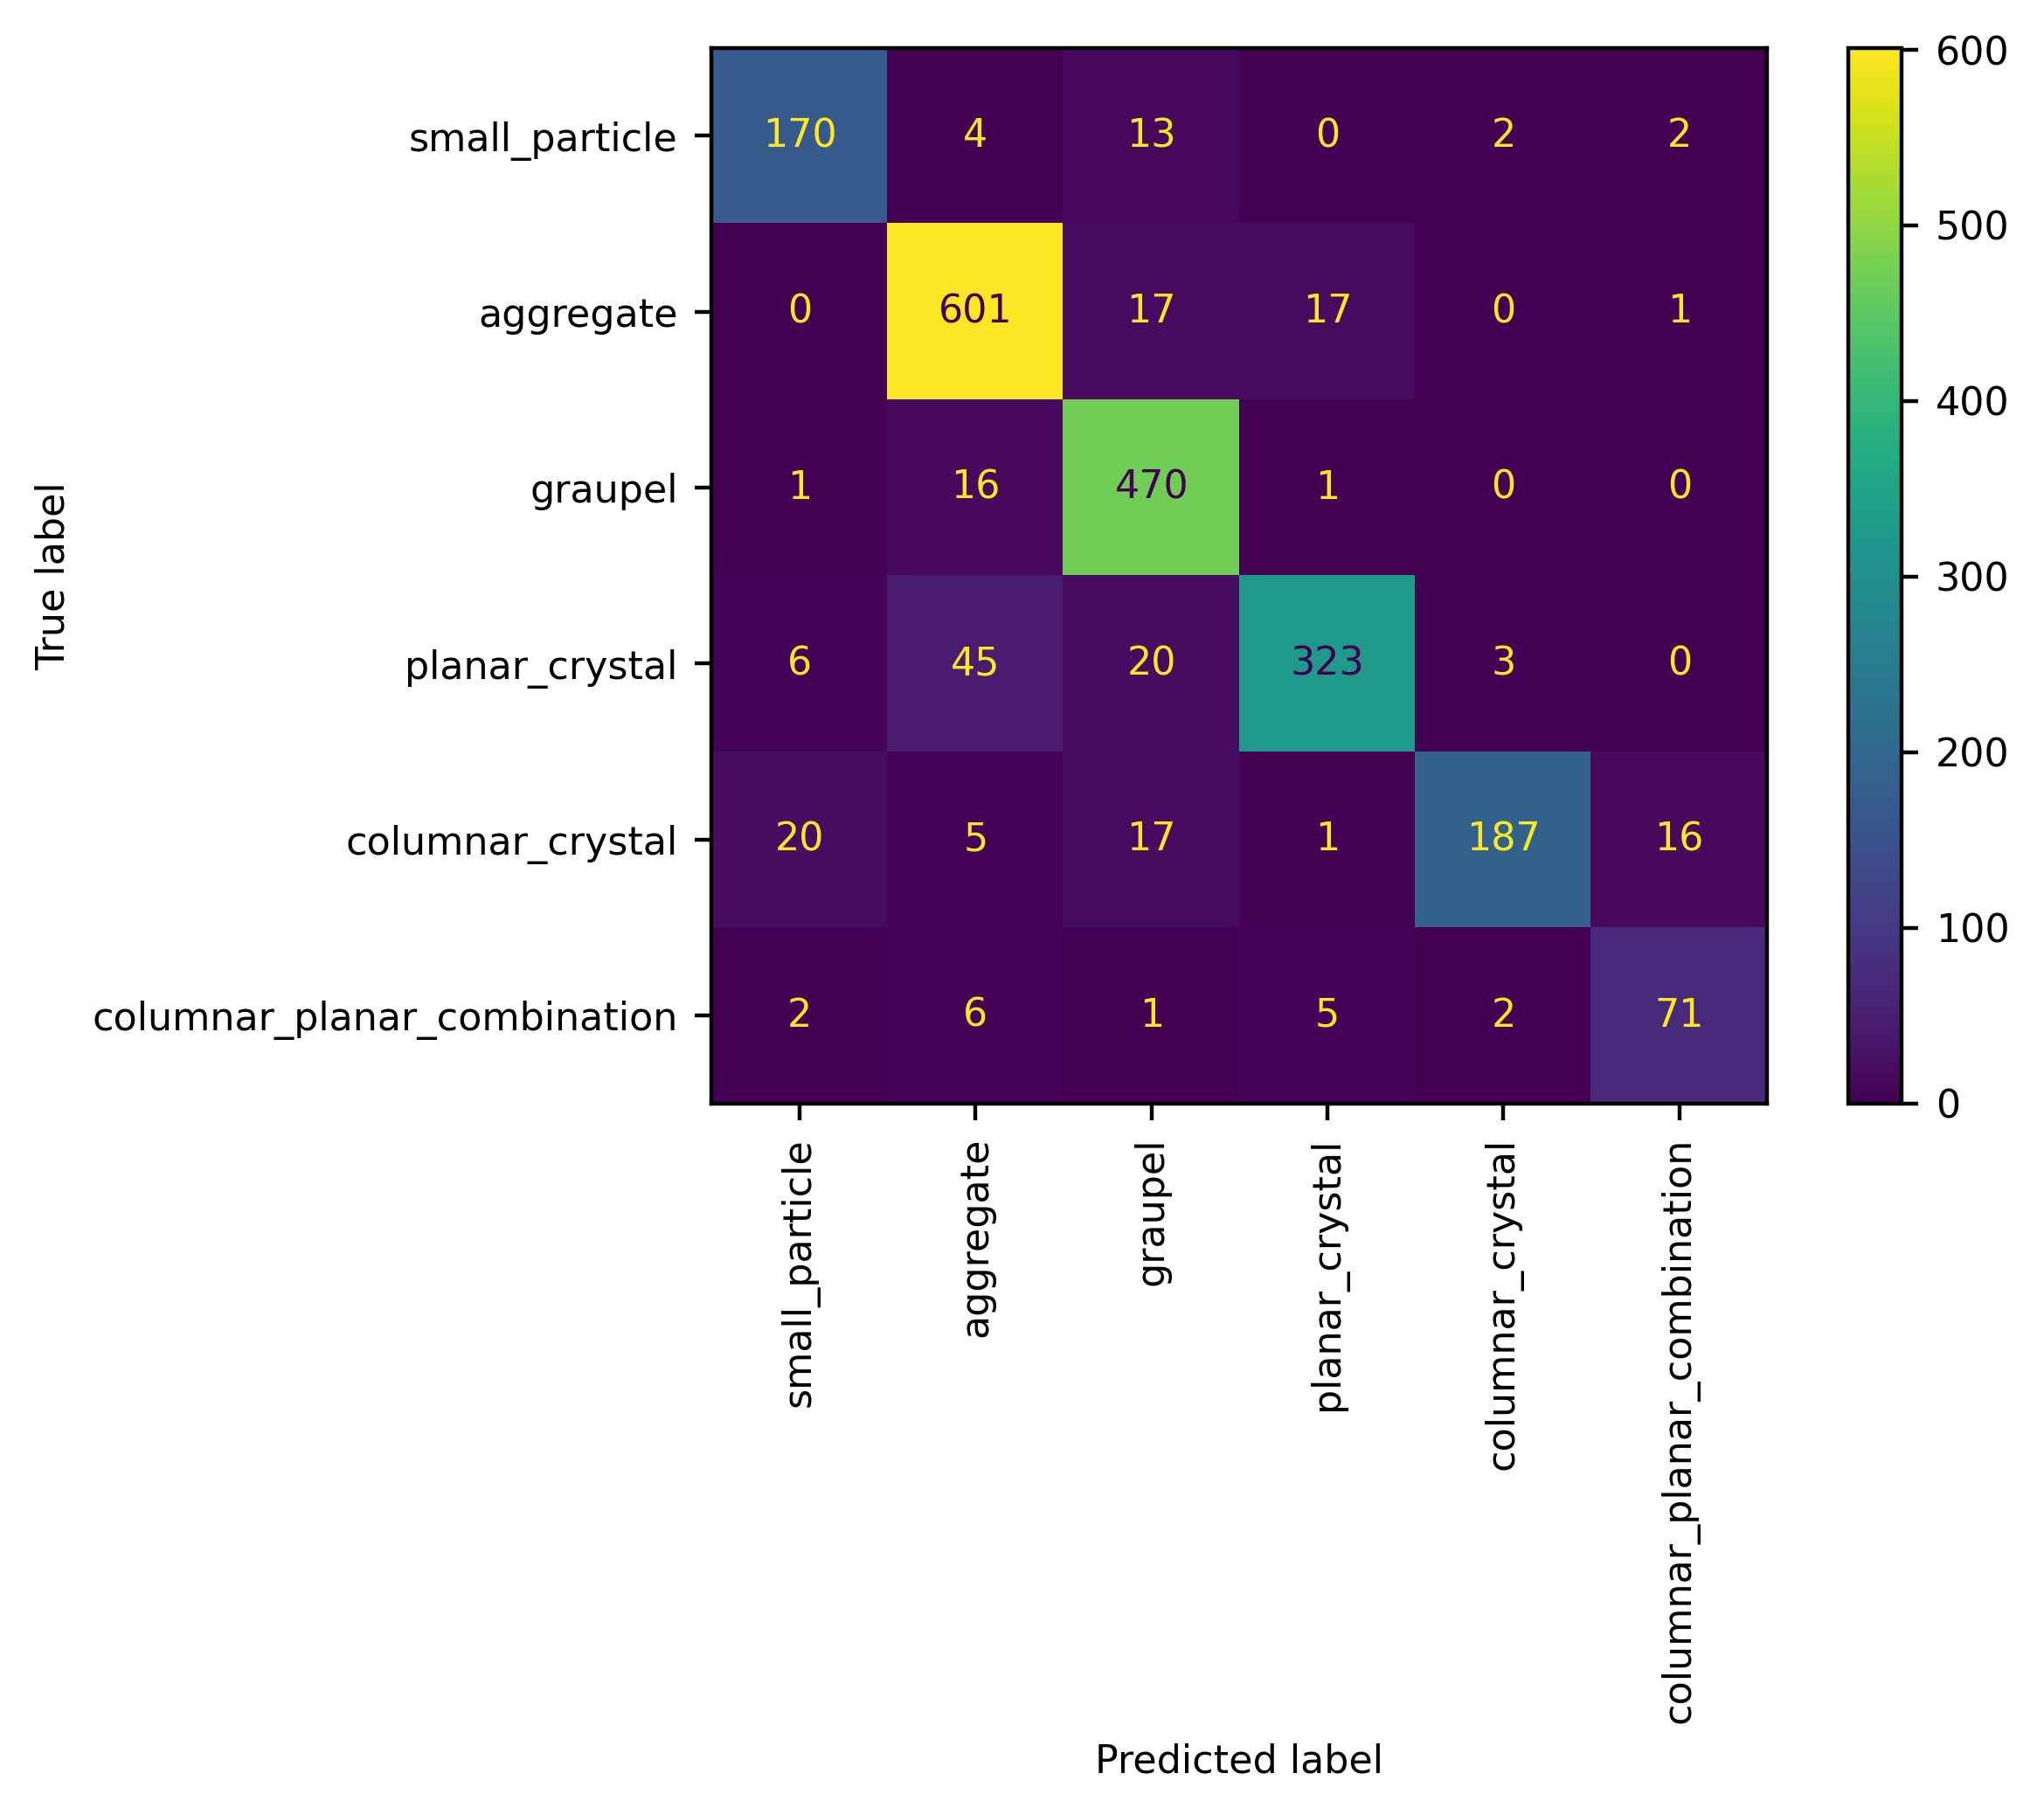

In [ ]:
# Now compare them and display the confusion matrix
cm = confusion_matrix(
    mascdb_keep.hl_snowflake_class_name,
    mascdb_keep.snowflake_class_name,
    labels=mascdb_keep.hl_snowflake_class_name.unique(),
)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mascdb_keep.hl_snowflake_class_name.unique())
cm_plot.plot(xticks_rotation="vertical")

We can observe that:
- Something better could be achieved if anyone wants to implement a new method, please take advantage of this benchmark dataset
- We must remember that human interpretation is not infallible and also the *human label* dataset, produced by different people may have a certain degree of internal inconsistency 

## Riming degree estimation
We now can do the same for the riming degree classes. We will see that this information, more complex in nature, leads to a larger discrepancy between human interpretation and model performance: there is room for improvement!

In [ ]:
# Keep only the riming class columns (hl_* are the human label ones)
mascdb_keep = mascdb_full_db[["flake_id", "riming_class_id", "riming_class_name", "hl_riming_class_id"]]
mascdb_keep = mascdb_keep.dropna()

# Let's create a new column with hl_riming_class_name
hl_riming_class_name = [get_riming_class_id_dict()[i] for i in mascdb_keep.hl_riming_class_id]
mascdb_keep["hl_riming_class_name"] = hl_riming_class_name

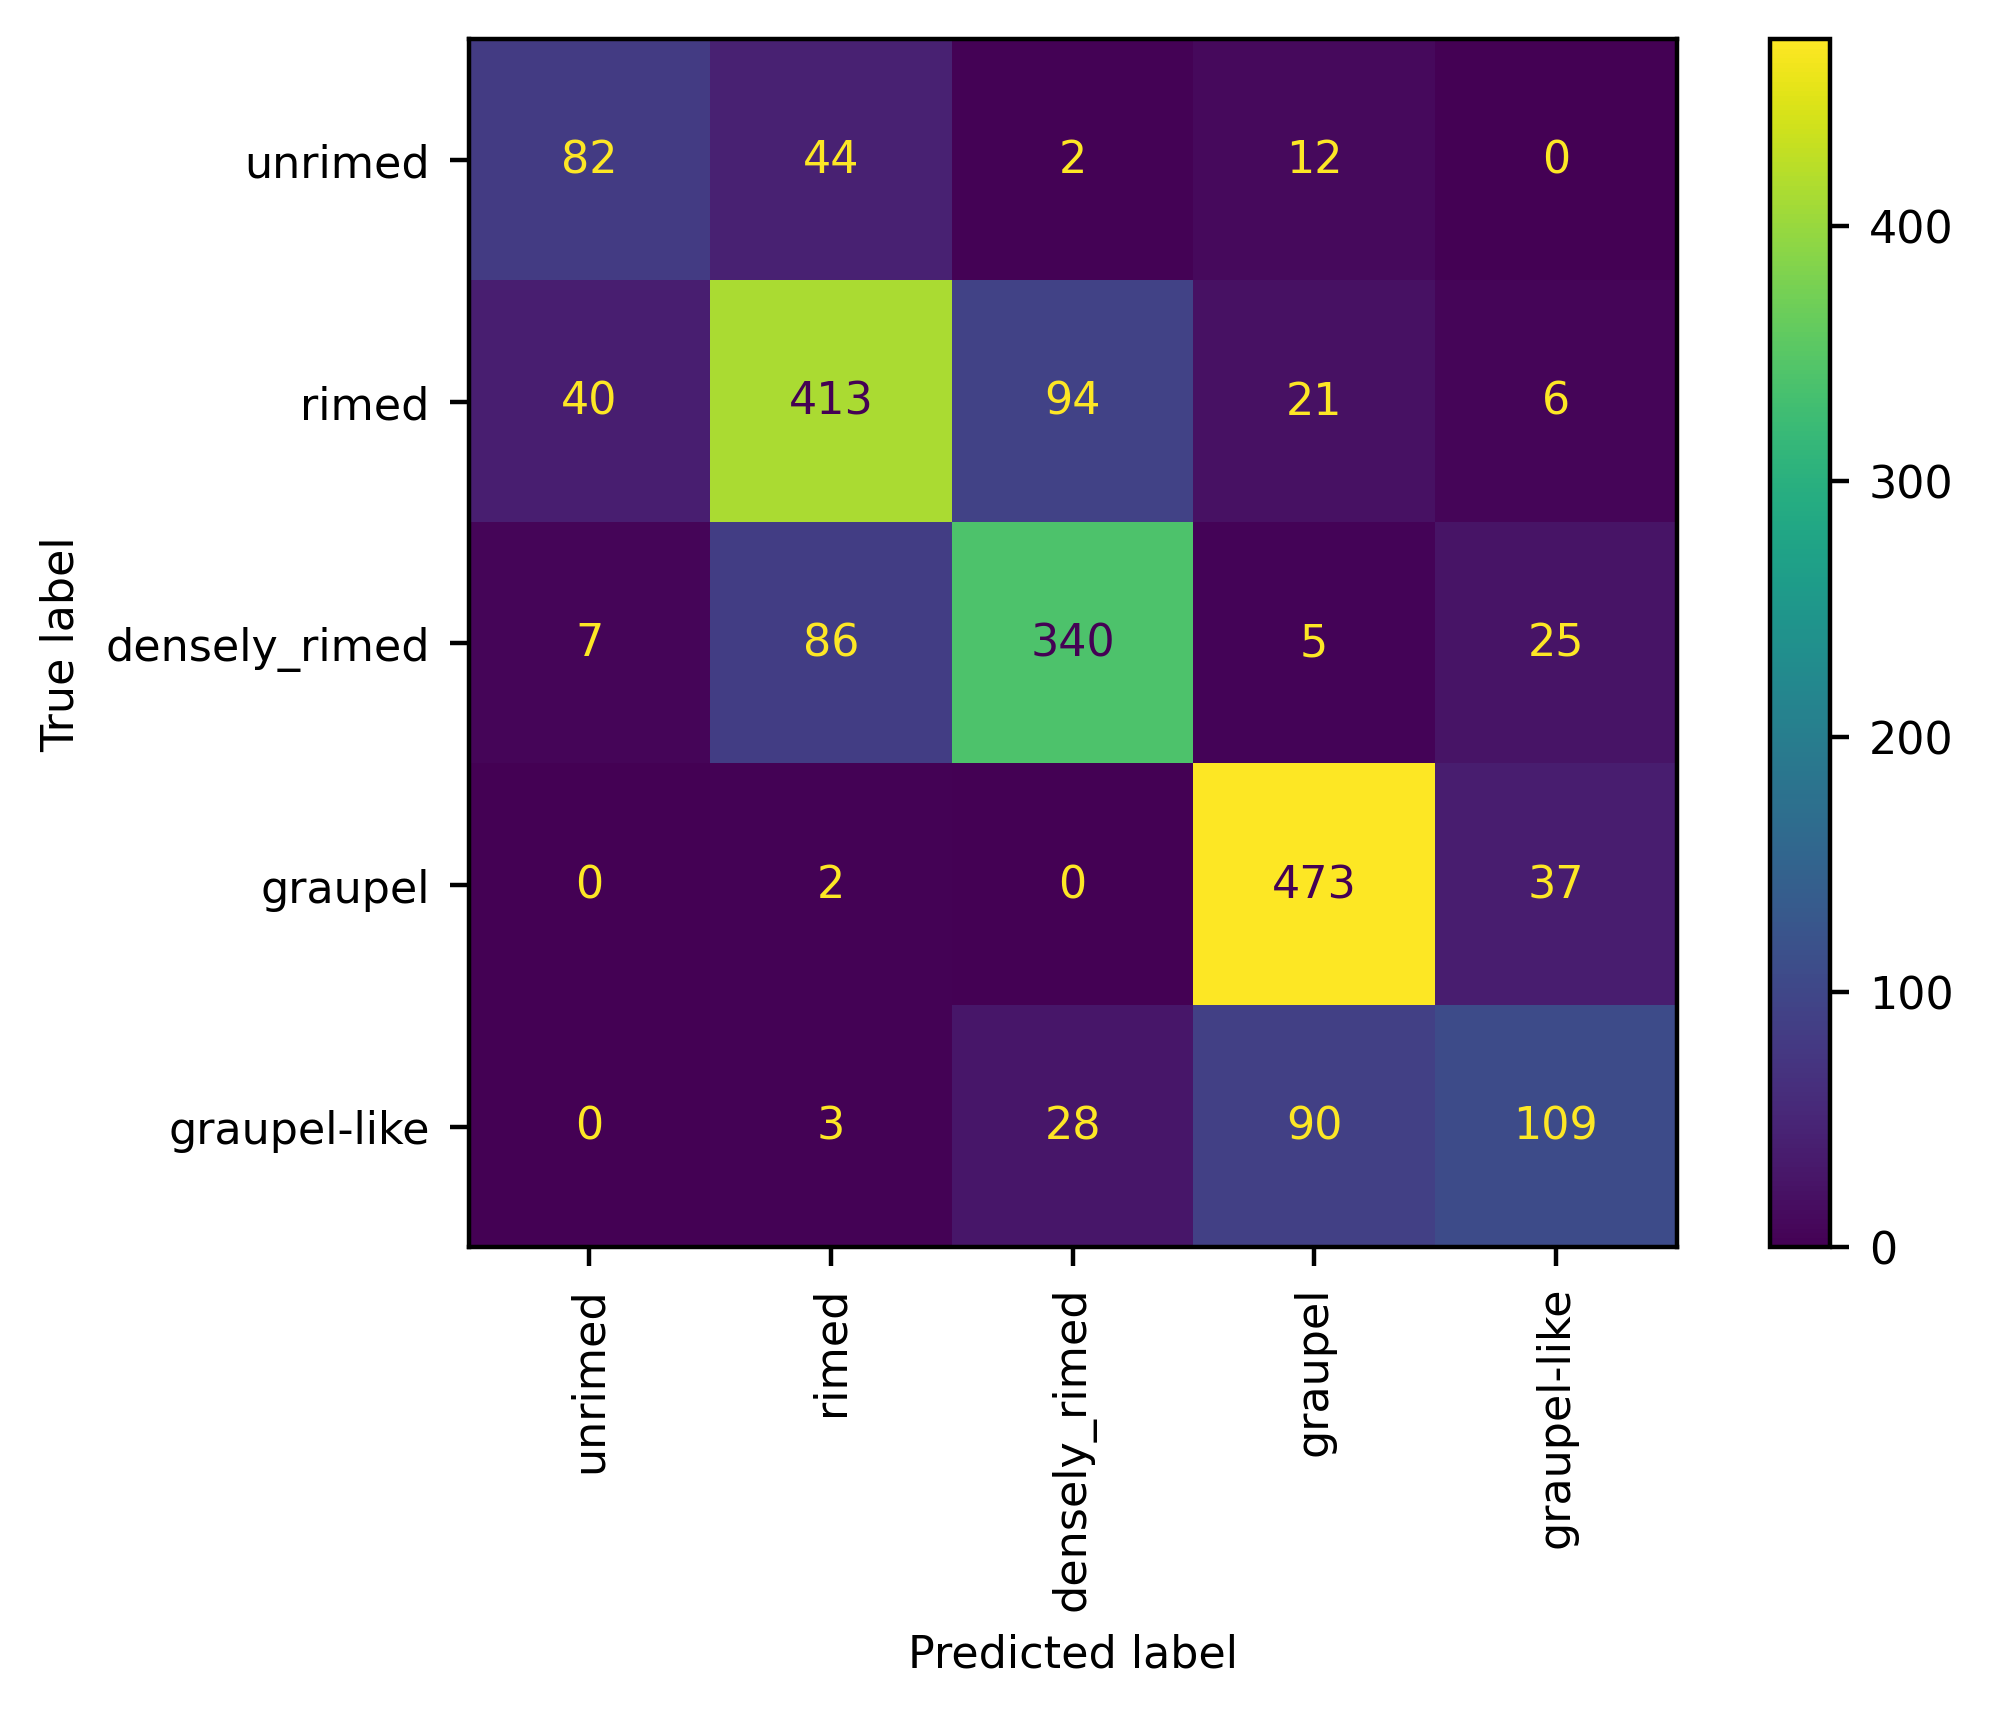

In [ ]:
# Now compare them and display the confusion matrix
cm = confusion_matrix(
    mascdb_keep.hl_riming_class_name, mascdb_keep.riming_class_name, labels=mascdb_keep.hl_riming_class_name.unique(),
)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mascdb_keep.hl_riming_class_name.unique())
cm_plot.plot(xticks_rotation="vertical")

## Melting identification
And finally, let's do the same steps for the identification of particles visually resembling melting snwoflakes

In [ ]:
# Keep only the melting class columns (hl_* are the human label ones)
mascdb_keep = mascdb_full_db[["flake_id", "melting_class_id", "melting_class_name", "hl_melting_class_id"]]
mascdb_keep = mascdb_keep.dropna()

# Let's create a new column with hl_melting_class_name
hl_melting_class_name = [get_melting_class_id_dict()[i] for i in mascdb_keep.hl_melting_class_id]
mascdb_keep["hl_melting_class_name"] = hl_melting_class_name

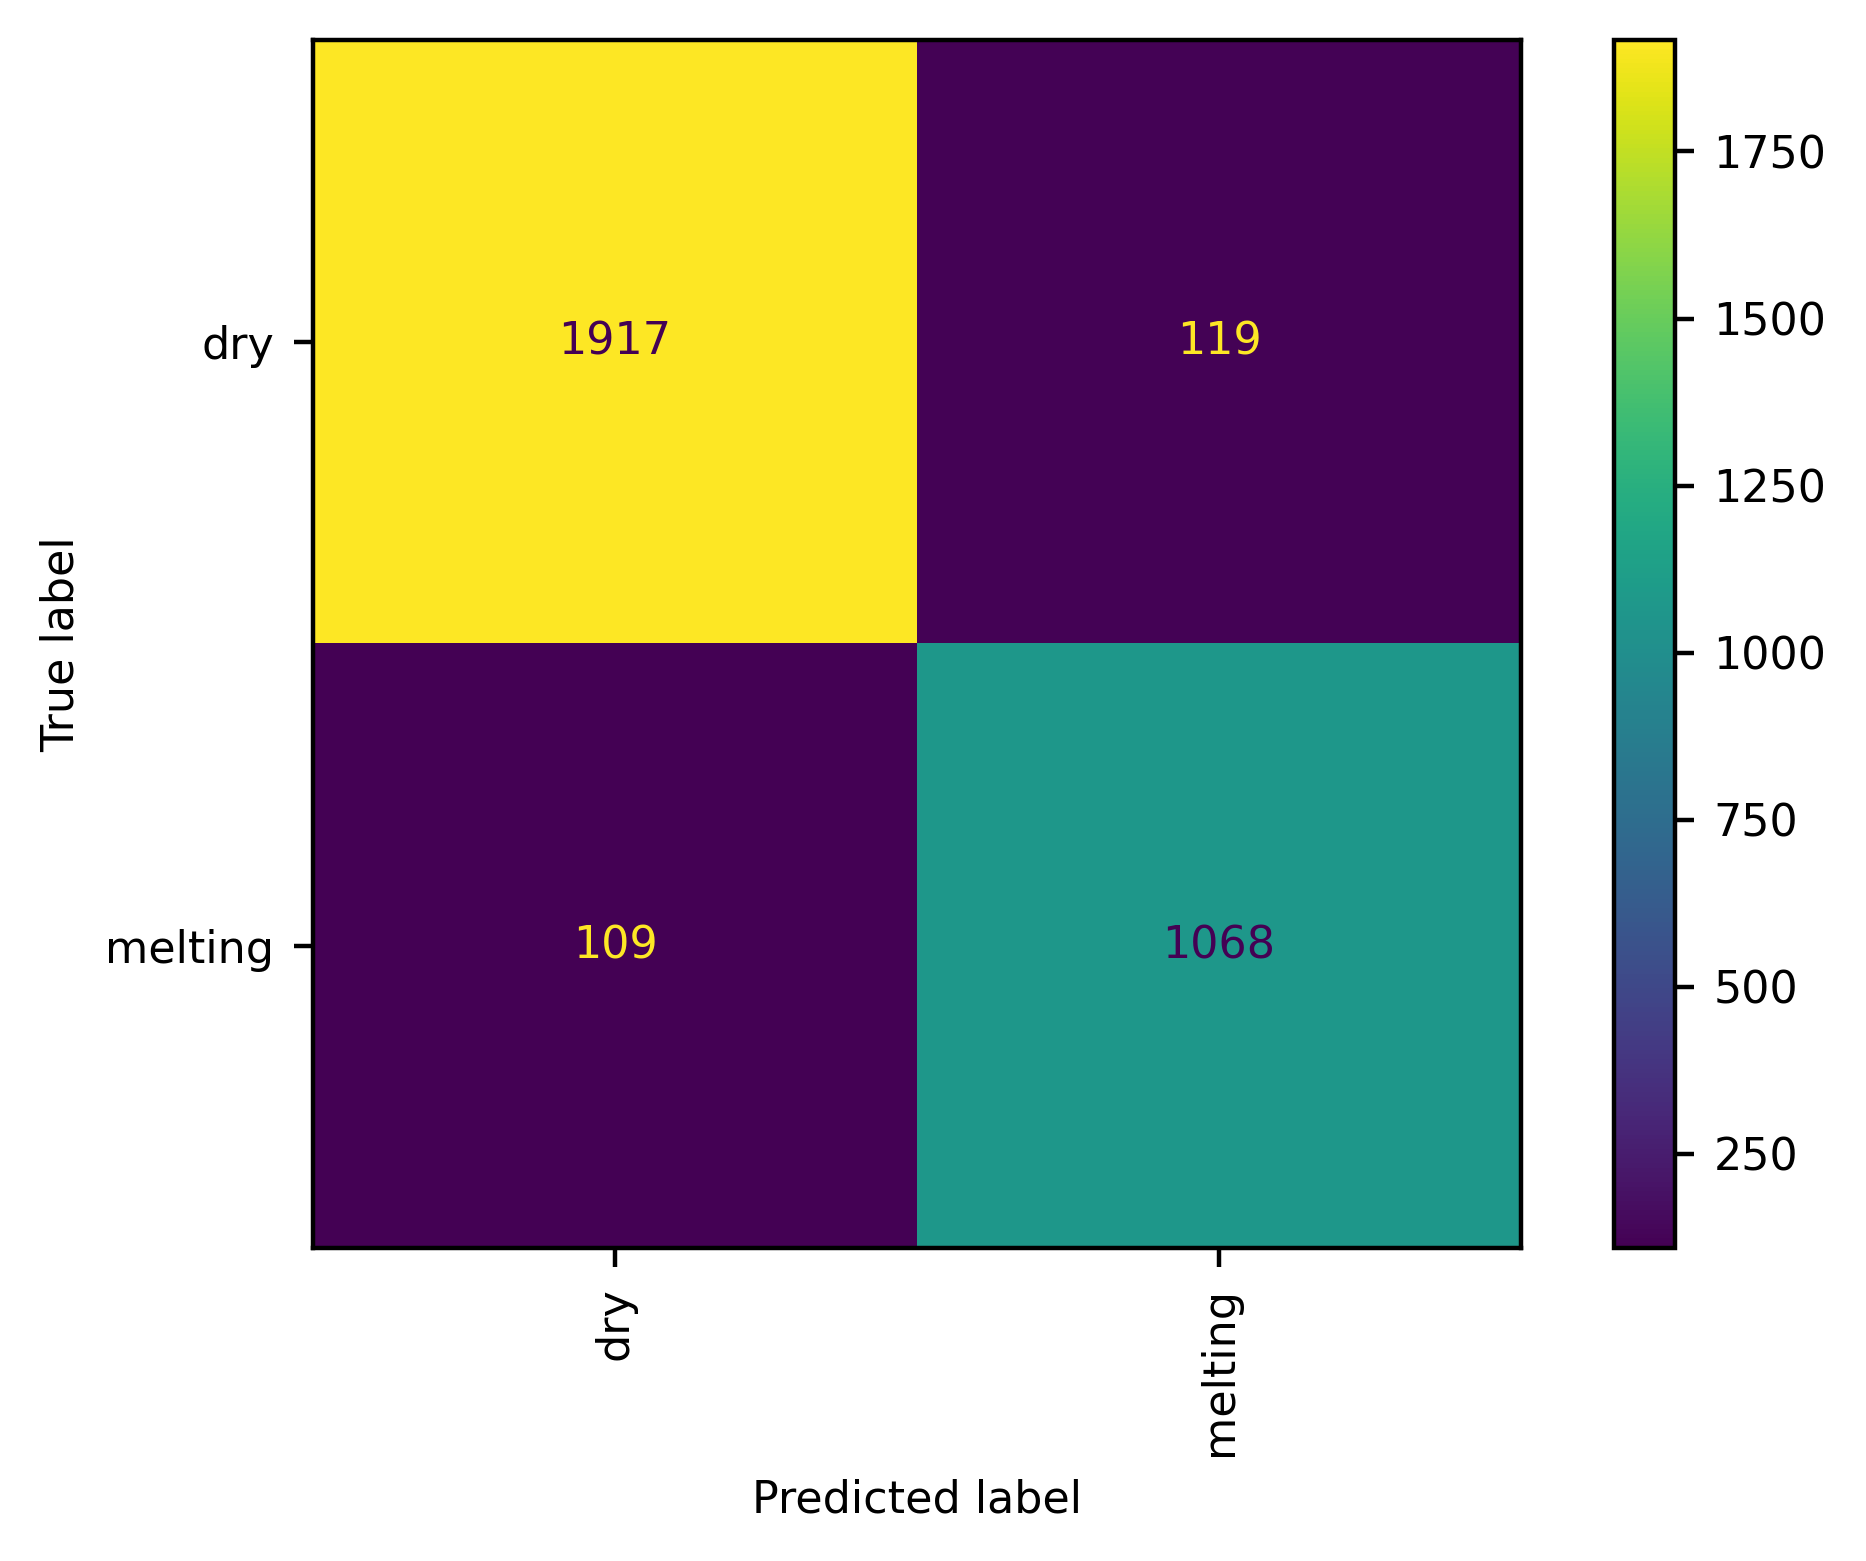

In [ ]:
# Now compare them and display the confusion matrix
cm = confusion_matrix(
    mascdb_keep.hl_melting_class_name, mascdb_keep.melting_class_name, labels=mascdb_keep.hl_melting_class_name.unique(),
)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mascdb_keep.hl_melting_class_name.unique())
cm_plot.plot(xticks_rotation="vertical")